In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
 df=pd.read_csv('CarPrice_Assignment.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.shape

(205, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
df['carvolume']=df.carlength*df.carheight*df.carwidth

In [9]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carvolume
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,528019.904
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,528019.904
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,587592.640
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,634816.956
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,636734.832


In [10]:
df=df.drop(['CarName','car_ID','CarName','carlength','carwidth','carheight'],axis=1)

In [11]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carvolume
0,3,gas,std,two,convertible,rwd,front,88.6,2548,dohc,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,528019.904
1,3,gas,std,two,convertible,rwd,front,88.6,2548,dohc,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,528019.904
2,1,gas,std,two,hatchback,rwd,front,94.5,2823,ohcv,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,587592.640
3,2,gas,std,four,sedan,fwd,front,99.8,2337,ohc,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,634816.956
4,2,gas,std,four,sedan,4wd,front,99.4,2824,ohc,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,636734.832


In [12]:
df.shape

(205, 22)

In [13]:
df.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [14]:
df.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [15]:
df.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [16]:
df.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [17]:
df1=df[['fueltype','aspiration','doornumber','enginelocation']]

In [18]:
df1.head()

,fueltype,aspiration,doornumber,enginelocation
0,gas,std,two,front
1,gas,std,two,front
2,gas,std,two,front
3,gas,std,four,front
4,gas,std,four,front


In [19]:
df1=df1.apply(lambda x: x.map({'gas':1,'diesel':0,'std':1,'turbo':0,'four':1,'two':0,'front':1,'rear':0}))

In [20]:
df1.head()

,fueltype,aspiration,doornumber,enginelocation
0,1,1,0,1
1,1,1,0,1
2,1,1,0,1
3,1,1,1,1
4,1,1,1,1


In [21]:
df=df.drop(['fueltype','aspiration','doornumber','enginelocation'],axis=1)

In [22]:
df.head()

,symboling,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carvolume
0,3,convertible,rwd,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,528019.904
1,3,convertible,rwd,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,528019.904
2,1,hatchback,rwd,94.5,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,587592.640
3,2,sedan,fwd,99.8,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,634816.956
4,2,sedan,4wd,99.4,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,636734.832


In [23]:
df=pd.concat([df,df1],axis=1)

In [24]:
df.head()

,symboling,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,...,horsepower,peakrpm,citympg,highwaympg,price,carvolume,fueltype,aspiration,doornumber,enginelocation
0,3,convertible,rwd,88.6,2548,dohc,four,130,mpfi,3.47,...,111,5000,21,27,13495.0,528019.904,1,1,0,1
1,3,convertible,rwd,88.6,2548,dohc,four,130,mpfi,3.47,...,111,5000,21,27,16500.0,528019.904,1,1,0,1
2,1,hatchback,rwd,94.5,2823,ohcv,six,152,mpfi,2.68,...,154,5000,19,26,16500.0,587592.640,1,1,0,1
3,2,sedan,fwd,99.8,2337,ohc,four,109,mpfi,3.19,...,102,5500,24,30,13950.0,634816.956,1,1,1,1
4,2,sedan,4wd,99.4,2824,ohc,five,136,mpfi,3.19,...,115,5500,18,22,17450.0,636734.832,1,1,1,1


In [25]:
df2=df[['carbody','drivewheel','enginetype','cylindernumber','fuelsystem']]

In [26]:
df2.head()

,carbody,drivewheel,enginetype,cylindernumber,fuelsystem
0,convertible,rwd,dohc,four,mpfi
1,convertible,rwd,dohc,four,mpfi
2,hatchback,rwd,ohcv,six,mpfi
3,sedan,fwd,ohc,four,mpfi
4,sedan,4wd,ohc,five,mpfi


In [27]:
df2=pd.get_dummies(df2,drop_first=True)

In [28]:
df2.head()

,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [29]:
df=df.drop(['carbody','drivewheel','enginetype','cylindernumber','fuelsystem'],axis=1)

In [30]:
df=pd.concat([df,df2],axis=1)

In [31]:
df.head()

,symboling,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,2548,130,3.47,2.68,9.0,111,5000,21,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,2548,130,3.47,2.68,9.0,111,5000,21,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,2823,152,2.68,3.47,9.0,154,5000,19,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,2337,109,3.19,3.40,10.0,102,5500,24,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,2824,136,3.19,3.40,8.0,115,5500,18,...,0,0,0,0,0,0,0,1,0,0


In [32]:
df_train,df_test=train_test_split(df,train_size=0.70,random_state=100)

In [33]:
df_train.shape

(143, 42)

In [34]:
df_test.shape

(62, 42)

In [35]:
li=['symboling','wheelbase','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price','carvolume']
scaler=MinMaxScaler()
df_train[li]=scaler.fit_transform(df_train[li])
df_train.head()

,symboling,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,0.6,0.244828,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,...,0,0,0,1,0,0,0,0,0,0
125,1.0,0.272414,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,...,0,0,0,0,0,0,0,1,0,0
166,0.6,0.272414,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.068966,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,...,0,0,0,0,0,0,0,1,0,0
199,0.2,0.610345,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,...,0,0,0,0,0,0,0,1,0,0


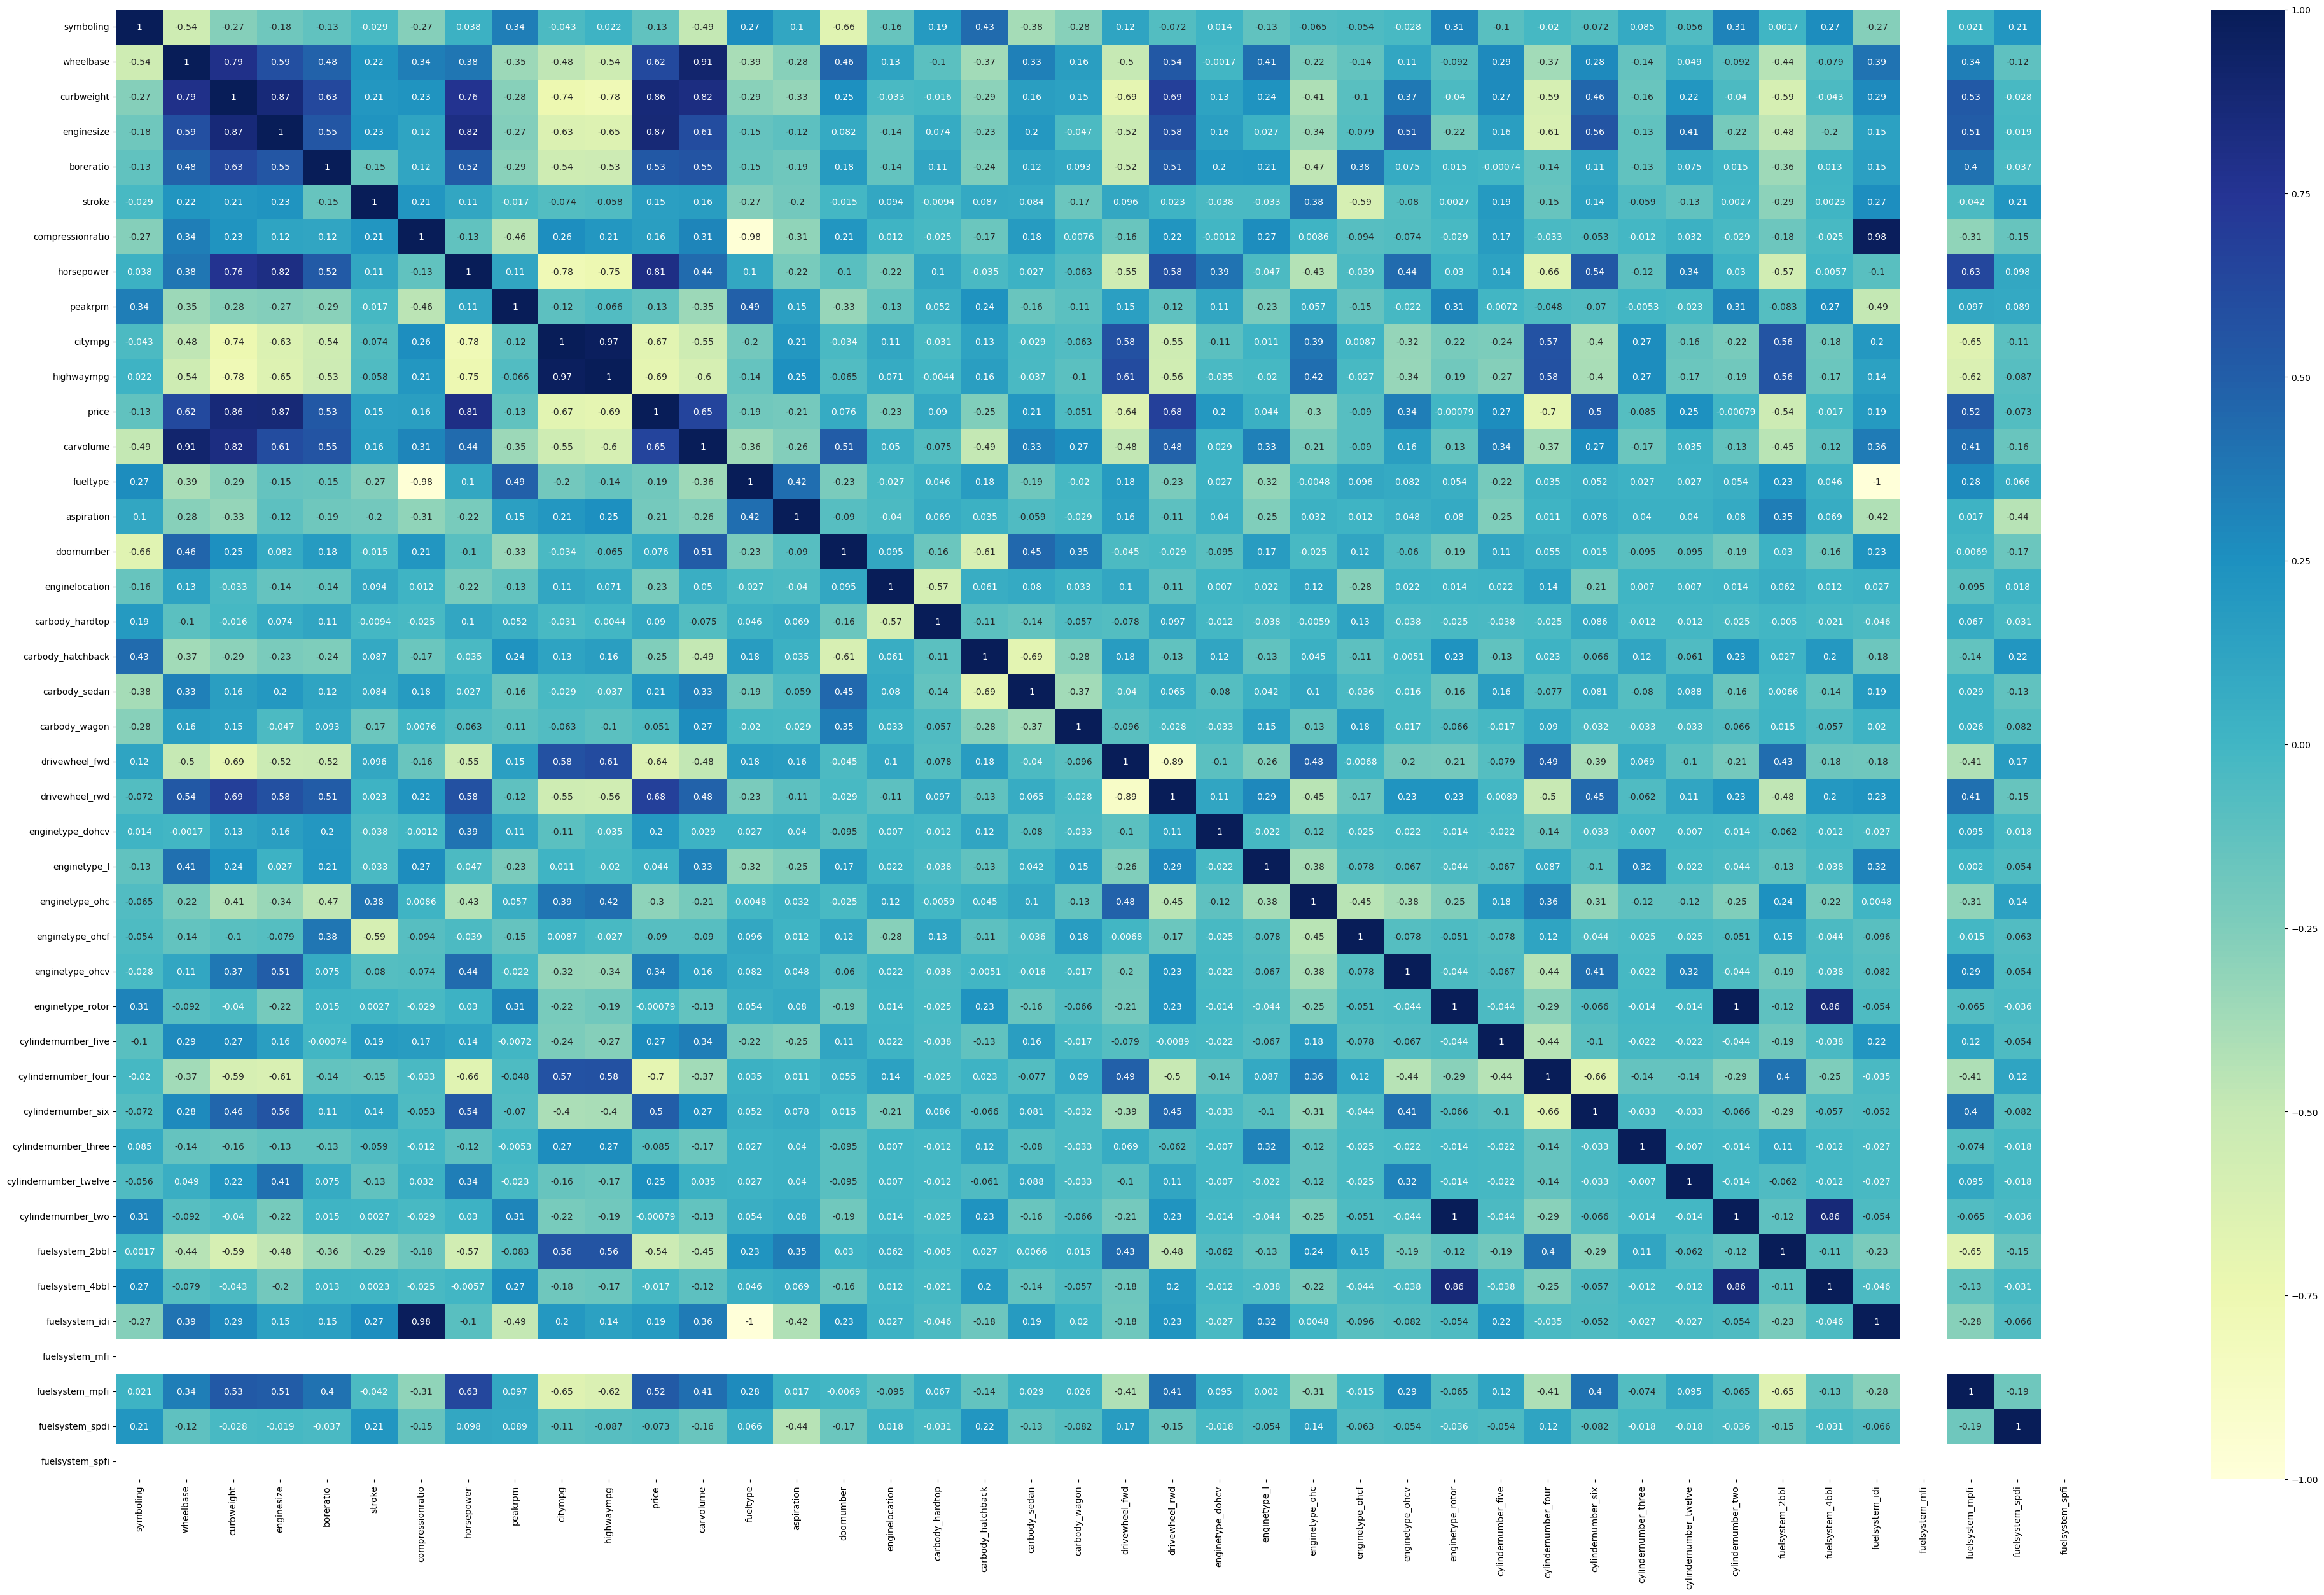

In [36]:
plt.figure(figsize = (50, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [37]:
y_train=df_train.pop('price')
X_train=df_train

In [38]:
X_train.head()

,symboling,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,0.6,0.244828,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,...,0,0,0,1,0,0,0,0,0,0
125,1.0,0.272414,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,...,0,0,0,0,0,0,0,1,0,0
166,0.6,0.272414,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.068966,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,...,0,0,0,0,0,0,0,1,0,0
199,0.2,0.610345,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,...,0,0,0,0,0,0,0,1,0,0


In [39]:
y_train.head()

122    0.068818
125    0.466890
166    0.122110
1      0.314446
199    0.382131
Name: price, dtype: float64

In [49]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm,n_features_to_select=13)
rfe = rfe.fit(X_train, y_train)

In [50]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('const', False, 2),
 ('wheelbase', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('stroke', True, 1),
 ('horsepower', True, 1),
 ('highwaympg', True, 1),
 ('enginelocation', True, 1),
 ('carbody_hardtop', True, 1),
 ('enginetype_ohc', True, 1),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_three', True, 1),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', True, 1)]

In [51]:
col = X_train.columns[rfe.support_]
col

Index(['wheelbase', 'curbweight', 'enginesize', 'stroke', 'horsepower',
       'highwaympg', 'enginelocation', 'carbody_hardtop', 'enginetype_ohc',
       'enginetype_rotor', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two'],
      dtype='object')

In [52]:
X_train_new=X_train[col]

In [53]:
X_train_new.head()

,wheelbase,curbweight,enginesize,stroke,horsepower,highwaympg,enginelocation,carbody_hardtop,enginetype_ohc,enginetype_rotor,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
122,0.244828,0.272692,0.139623,0.525253,0.083333,0.567568,1,0,1,0,0,0,0
125,0.272414,0.500388,0.339623,0.464646,0.395833,0.270270,1,0,1,0,0,0,0
166,0.272414,0.314973,0.139623,0.449495,0.266667,0.324324,1,0,0,0,0,0,0
1,0.068966,0.411171,0.260377,0.247475,0.262500,0.270270,1,0,0,0,0,0,0
199,0.610345,0.647401,0.260377,0.484848,0.475000,0.135135,1,0,1,0,0,0,0


In [54]:
X_train=sm.add_constant(X_train_new)

In [55]:
lm=sm.OLS(y_train,X_train)
lm_model=lm.fit()

In [56]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     102.2
Date:                Fri, 13 Oct 2023   Prob (F-statistic):           4.75e-60
Time:                        09:37:02   Log-Likelihood:                 184.60
No. Observations:                 143   AIC:                            -343.2
Df Residuals:                     130   BIC:                            -304.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1016      0.100      1.016      0.312      -0.096       0.299
wheelbase                 0.1264      0.057      2.212      0.029       0.013       0.239
curbweight                0.3228      0.100      3.213      0.002       0.124       0.522
enginesize                0.9377      0.119      7.891      0.000       0.703       1.173
stroke                   -0.3260      0.051     -6.384      0.000      -0.427      -0.225
horsepower                0.3071      0.082      3.727      0.000       0.144       0.470
highwaympg                0.1083      0.062      1.739      0.084      -0.015       0.231
enginelocation           -0.3380      0.090     -3.736      0.000      -0.517      -0.159
carbody_hardtop          -0.0548      0.050     -1.097      0.275      -0.154       0.044
enginetype_ohc            0.1463      0.019      7.815      0.000       0.109       0.183
enginetype_rotor          0.1698      0.023      7.239      0.000       0.123       0.216
cylindernumber_three      0.2625      0.076      3.444      0.001       0.112       0.413
cylindernumber_twelve    -0.4034      0.090     -4.500      0.000      -0.581      -0.226
cylindernumber_two        0.1698      0.023      7.239      0.000       0.123       0.216
==============================================================================
Omnibus:                       10.165   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               22.977
Skew:                           0.119   Prob(JB):                     1.02e-05
Kurtosis:                       4.949   Cond. No.                     4.20e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.74e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [57]:
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,enginetype_rotor,inf
13,cylindernumber_two,inf
0,const,293.49
2,curbweight,13.13
3,enginesize,9.84
5,horsepower,5.42
1,wheelbase,4.02
6,highwaympg,4.01
9,enginetype_ohc,2.22
4,stroke,1.89


In [79]:
X_train=X_train_new.drop('enginetype_rotor',axis=1)

In [80]:
X_train=sm.add_constant(X_train)
lm=sm.OLS(y_train,X_train)
lm_model=lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     102.2
Date:                Fri, 13 Oct 2023   Prob (F-statistic):           4.75e-60
Time:                        09:40:54   Log-Likelihood:                 184.60
No. Observations:                 143   AIC:                            -343.2
Df Residuals:                     130   BIC:                            -304.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1016      0.100      1.016      0.312      -0.096       0.299
wheelbase                 0.1264      0.057      2.212      0.029       0.013       0.239
curbweight                0.3228      0.100      3.213      0.002       0.124       0.522
enginesize                0.9377      0.119      7.891      0.000       0.703       1.173
stroke                   -0.3260      0.051     -6.384      0.000      -0.427      -0.225
horsepower                0.3071      0.082      3.727      0.000       0.144       0.470
highwaympg                0.1083      0.062      1.739      0.084      -0.015       0.231
enginelocation           -0.3380      0.090     -3.736      0.000      -0.517      -0.159
carbody_hardtop          -0.0548      0.050     -1.097      0.275      -0.154       0.044
enginetype_ohc            0.1463      0.019      7.815      0.000       0.109       0.183
cylindernumber_three      0.2625      0.076      3.444      0.001       0.112       0.413
cylindernumber_twelve    -0.4034      0.090     -4.500      0.000      -0.581      -0.226
cylindernumber_two        0.3397      0.047      7.239      0.000       0.247       0.433
==============================================================================
Omnibus:                       10.165   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               22.977
Skew:                           0.119   Prob(JB):                     1.02e-05
Kurtosis:                       4.949   Cond. No.                         47.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,293.49
2,curbweight,13.13
3,enginesize,9.84
5,horsepower,5.42
1,wheelbase,4.02
6,highwaympg,4.01
9,enginetype_ohc,2.22
4,stroke,1.89
12,cylindernumber_two,1.76
7,enginelocation,1.67


In [91]:
X_train=X_train_new.drop(['enginetype_rotor','highwaympg','curbweight'],axis=1)

In [92]:
X_train=sm.add_constant(X_train)
lm=sm.OLS(y_train,X_train)
lm_model=lm.fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     113.9
Date:                Fri, 13 Oct 2023   Prob (F-statistic):           7.14e-60
Time:                        09:43:48   Log-Likelihood:                 178.89
No. Observations:                 143   AIC:                            -335.8
Df Residuals:                     132   BIC:                            -303.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1652      0.094      1.761      0.081      -0.020       0.351
wheelbase                 0.2389      0.041      5.839      0.000       0.158       0.320
enginesize                1.1361      0.104     10.951      0.000       0.931       1.341
stroke                   -0.3157      0.052     -6.066      0.000      -0.419      -0.213
horsepower                0.3209      0.073      4.390      0.000       0.176       0.466
enginelocation           -0.3265      0.093     -3.506      0.001      -0.511      -0.142
carbody_hardtop          -0.0600      0.052     -1.163      0.247      -0.162       0.042
enginetype_ohc            0.1382      0.019      7.213      0.000       0.100       0.176
cylindernumber_three      0.2814      0.076      3.703      0.000       0.131       0.432
cylindernumber_twelve    -0.4438      0.090     -4.923      0.000      -0.622      -0.265
cylindernumber_two        0.3462      0.046      7.553      0.000       0.256       0.437
==============================================================================
Omnibus:                        9.851   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               17.390
Skew:                           0.272   Prob(JB):                     0.000167
Kurtosis:                       4.619   Cond. No.                         40.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,242.10
2,enginesize,7.03
4,horsepower,4.00
7,enginetype_ohc,2.18
1,wheelbase,1.93
3,stroke,1.84
5,enginelocation,1.66
10,cylindernumber_two,1.57
9,cylindernumber_twelve,1.55
6,carbody_hardtop,1.50


In [94]:
y_train_pred=lm_model.predict(X_train)

In [95]:
res=y_train-y_train_pred

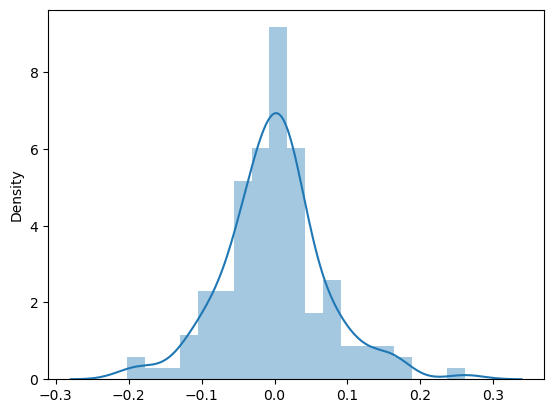

In [96]:
sns.distplot(res)
plt.show()

# evaluation

In [97]:
X_train.columns

Index(['const', 'wheelbase', 'enginesize', 'stroke', 'horsepower',
       'enginelocation', 'carbody_hardtop', 'enginetype_ohc',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [102]:
li=['symboling','wheelbase','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price','carvolume']
df_test[li]=scaler.transform(df_test[li])
df_test.head()

,symboling,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
160,0.4,0.313793,0.235066,0.139623,0.404762,0.424242,0.12500,0.091667,0.265306,0.694444,...,0,0,0,1,0,0,0,0,0,0
186,0.8,0.368966,0.305275,0.181132,0.404762,0.611111,0.12500,0.154167,0.448980,0.388889,...,0,0,0,0,0,0,0,1,0,0
59,0.6,0.420690,0.347944,0.230189,0.563492,0.606061,0.10000,0.150000,0.265306,0.361111,...,0,0,0,1,0,0,0,0,0,0
165,0.6,0.272414,0.301396,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,...,0,0,0,0,0,0,0,1,0,0
140,0.8,0.231034,0.291699,0.177358,0.746032,0.227273,0.10625,0.104167,0.102041,0.361111,...,0,0,0,1,0,0,0,0,0,0


In [103]:
df_test.describe()

,symboling,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.0,62.0,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.583871,0.437764,0.428470,0.265673,0.556580,0.544314,0.209375,0.248858,0.393351,0.328405,...,0.0,0.0,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129
std,0.271724,0.212861,0.179488,0.162820,0.228484,0.160738,0.273690,0.163376,0.192092,0.172009,...,0.0,0.0,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000
min,0.000000,0.000000,0.128394,0.067925,-0.111111,-0.060606,0.000000,0.016667,0.000000,0.027778,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.313793,0.305275,0.177358,0.404762,0.484848,0.093750,0.107292,0.265306,0.166667,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.387931,0.406129,0.226415,0.563492,0.585859,0.125000,0.218750,0.346939,0.305556,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000
75%,0.800000,0.570690,0.564876,0.316038,0.746032,0.641414,0.150000,0.295833,0.540816,0.444444,...,0.0,0.0,0.0,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.182759,0.935609,0.932075,0.888889,0.863636,1.000000,0.662500,1.000000,0.694444,...,0.0,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [104]:
y_test=df_test.pop('price')
X_test=df_test

In [106]:
X_test=sm.add_constant(X_test)

In [107]:
X_test=X_test[['const', 'wheelbase', 'enginesize', 'stroke', 'horsepower',
       'enginelocation', 'carbody_hardtop', 'enginetype_ohc',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two']]

In [108]:
y_test_pred=lm_model.predict(X_test)

In [109]:
r2=r2_score(y_test,y_test_pred)
r2

0.8414700188218034